<div style="color:white;background-color:black;border:5px solid powderblue;border-radius:25px;text-align:center;font-family:Copperplate">
    <h1>DATA DECISION PATHS</h1><hr style="border:2px solid powderblue">
    <div style="color:white;background-color:black;border-radius:25px;text-align:right;">
        <br>
        <h2 style="color:red;display:inline;">NAME:</h2><h2 style="display:inline;">Mohamadh Irfan</h2><br>
        <h2 style="color:red;display:inline;">BATCH:</h2><h2 style="display:inline;padding-right:62px;">AI-ELITE-7</h2>
    </div>
    <div style="color:white;background-color:black;border-radius:25px;text-align:Left;font-family:Courier New;margin-left:4%;">
        <h3 style="color:white;font-weight:bold;font-family:Papyrus">Data Description:</h3>
        <p style="padding-left:8%;padding-right:8%;">
        - The dataset consists of three columns and 100 rows which includes two feature columns and one label column.<br>
        - Features columns are in the form of float and continuous values ranges from <strong>[-29.969271 to 29.957195				]</strong> and <strong>[-29.999631 to 34.869783 ]</strong> and the means are at <strong>[0.061578	and 0.470548	]</strong>.<br>
         - Whereas label is in the form discreate numerical integer values that inclueds <strong>[0 and 1]</strong>. 50% of the data consists of 0 and rest consists of 1 as labels.<br>
            - There are zero duplicates and no null values consists in the dataset.<br>
            <strong>-</strong> Pattern that is formed by the input features is <strong>Non linearsep(outlier) shape</strong>. In the above dataset the labels of 0 and 1 are classified properly but consists of few outliers  in each class.
            <img src=https://cdn.discordapp.com/attachments/1060498631981023282/1109937943944114267/image.png
                 >
        </p>
        <br>
    </div>
</div>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("5.outlier.csv",header=None)

In [15]:
df.head()

,0,1,2
0,-17.897000,7.662423,0
1,-26.343161,-3.055257,0
2,-19.059771,-8.531838,0
3,-16.383898,-2.352667,0
4,-12.926541,9.074994,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       600 non-null    float64
 1   1       600 non-null    float64
 2   2       600 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 14.2 KB


In [17]:
df.duplicated().sum()

0

In [18]:
df.isna().sum()

0    0
1    0
2    0
dtype: int64

In [19]:
num=df.select_dtypes(include='number')

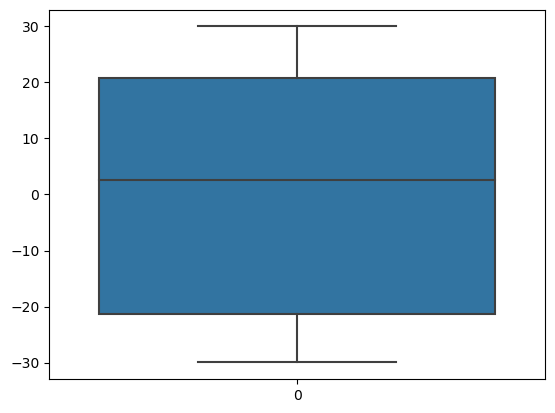

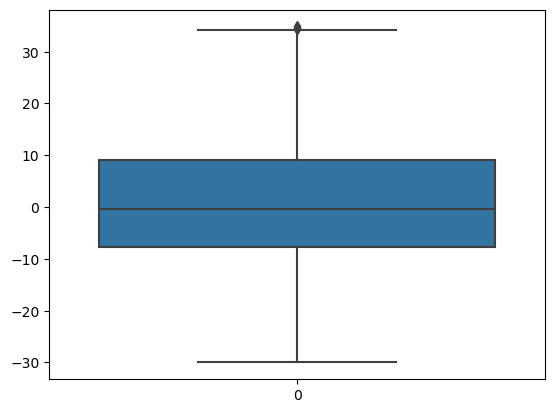

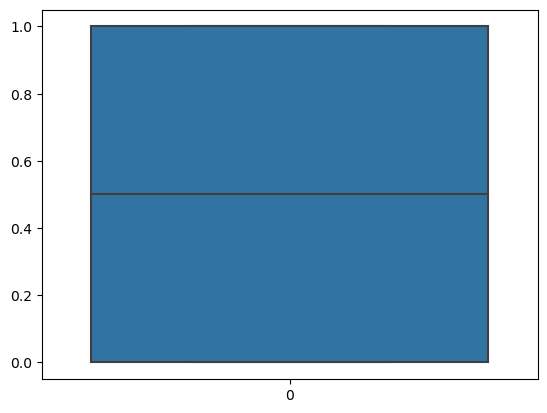

In [20]:
for i in num:
    sns.boxplot(num[i])
    plt.show()

In [21]:
df.describe()

,0,1,2
count,600.000000,600.000000,600.000000
mean,0.061578,0.470548,0.500000
std,21.233873,12.685787,0.500417
min,-29.969271,-29.999631,0.000000
25%,-21.243866,-7.736699,0.000000
50%,2.650017,-0.377631,0.500000
75%,20.820305,9.078000,1.000000
max,29.957195,34.869783,1.000000


In [22]:
df[2].value_counts()

0    300
1    300
Name: 2, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[[0,1]],df[2],test_size=0.2,random_state=42)

In [24]:
X_train.shape, X_test.shape

((480, 2), (120, 2))

In [25]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_trains = scale.fit_transform(X_train)
X_tests = scale.transform(X_test)

In [26]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [27]:
model = Sequential()
model.add(Dense(12,activation="relu",kernel_initializer="he_normal",input_dim=2))

model.add(Dense(10,activation="relu",kernel_initializer="he_normal"))

model.add(Dense(9,activation="relu",kernel_initializer="he_normal"))

model.add(Dense(8,activation="relu",kernel_initializer="he_normal"))

model.add(Dense(7,activation="relu",kernel_initializer="he_normal"))

model.add(Dense(6,activation="relu",kernel_initializer="he_normal"))

model.add(Dense(5,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(4,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(2,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                36        
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dense_2 (Dense)             (None, 9)                 99        
                                                                 
 dense_3 (Dense)             (None, 8)                 80        
                                                                 
 dense_4 (Dense)             (None, 7)                 63        
                                                                 
 dense_5 (Dense)             (None, 6)                 48        
                                                                 
 dense_6 (Dense)             (None, 5)                 3

In [29]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [30]:
history = model.fit(X_trains,y_train,epochs=50,batch_size=12,validation_split=0.2)

Epoch 1/50
32/32 [==============================] - 7s 31ms/step - loss: 0.6717 - accuracy: 0.5234 - val_loss: 0.6343 - val_accuracy: 0.7708
Epoch 2/50
32/32 [==============================] - 0s 8ms/step - loss: 0.6130 - accuracy: 0.6224 - val_loss: 0.5317 - val_accuracy: 0.8542
Epoch 3/50
32/32 [==============================] - 0s 8ms/step - loss: 0.5413 - accuracy: 0.7240 - val_loss: 0.4337 - val_accuracy: 0.9583
Epoch 4/50
32/32 [==============================] - 0s 8ms/step - loss: 0.5410 - accuracy: 0.7266 - val_loss: 0.4060 - val_accuracy: 0.9688
Epoch 5/50
32/32 [==============================] - 0s 9ms/step - loss: 0.5480 - accuracy: 0.7188 - val_loss: 0.3889 - val_accuracy: 0.9688
Epoch 6/50
32/32 [==============================] - 0s 7ms/step - loss: 0.5200 - accuracy: 0.7448 - val_loss: 0.3687 - val_accuracy: 0.9688
Epoch 7/50
32/32 [==============================] - 0s 8ms/step - loss: 0.4962 - accuracy: 0.7708 - val_loss: 0.3521 - val_accuracy: 0.9688
Epoch 8/50
32/32 [=

In [31]:
model.get_weights()

[array([[-2.4104967 , -0.02200696, -1.9983296 ,  1.0691421 , -2.0200722 ,
         -0.03358255,  0.72184604,  1.0015647 , -0.9180601 , -1.8041174 ,
         -0.50166315, -0.2838195 ],
        [-1.4323077 , -0.58520514, -0.49448645, -0.44272107, -0.6322619 ,
         -0.45950845, -0.23977661, -1.6123121 , -1.1481693 ,  0.37965477,
         -0.01598264, -0.04067836]], dtype=float32),
 array([ 0.29467562, -0.11206927,  0.25806662,  0.03832484,  0.26951793,
         0.10271315,  0.03543732, -0.08874745, -0.12409498, -0.03308848,
         0.00925927,  0.07602565], dtype=float32),
 array([[-0.2531641 ,  0.24994132, -0.03796992,  0.15867424, -0.4472212 ,
          0.57769966,  0.46032563,  0.42272902,  0.23822527,  0.7293513 ],
        [ 0.4876694 ,  0.22973283, -0.5967733 , -0.02582663,  0.5715469 ,
          0.21018894, -0.21156353, -0.20452888, -0.25487933,  0.06307364],
        [ 0.03400074,  0.09349088, -0.34493688,  0.21004334, -0.5201427 ,
         -0.29872167,  0.05030514,  0.2987459 

In [32]:
y_cap=model.predict(X_tests)

4/4 [==============================] - 0s 5ms/step


In [33]:
y_capf=np.where(y_cap>0.5,1,0)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

1.0

In [35]:
data = np.array([history.history["loss"],history.history["val_loss"]])
# data = data.reshape(50,2)
[[data[:,0].max(),data[:,1].max()]]

[[0.671742856502533, 0.6129810214042664]]

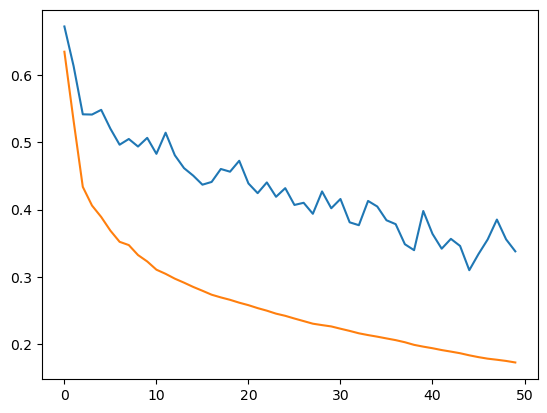

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

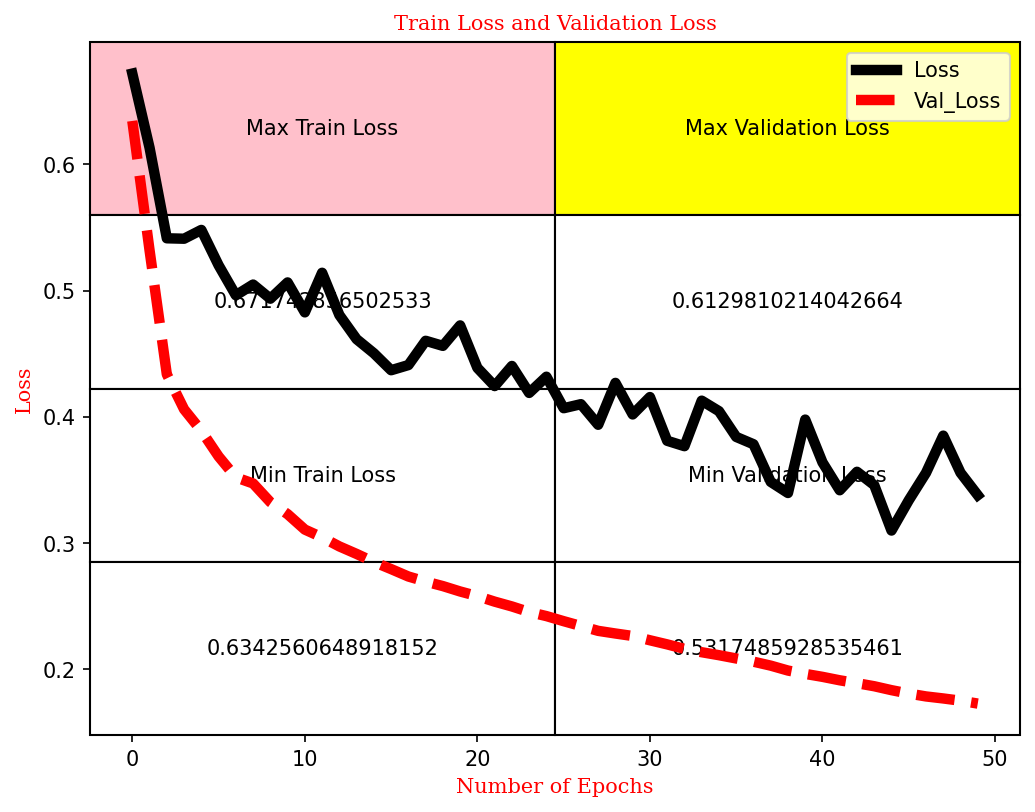

In [37]:
plt.figure(figsize=(8,6),dpi=150)
plt.plot(history.history["loss"],'black',linewidth=5)
plt.plot(history.history["val_loss"],'r--',linewidth=5)
plt.table(cellText=[[data[:,0].max(),data[:,1].max()],["Min Train Loss","Min Validation Loss"],[data[:,0].min(),data[:,1].min()]],cellLoc='center',colWidths=[0.4,0.4,0.4],
         colLabels=['Max Train Loss','Max Validation Loss'],colColours=['pink','yellow'],bbox=[0,0,1,1])
plt.legend(["Loss","Val_Loss"])
plt.title("Train Loss and Validation Loss",color='red',fontsize='medium',fontfamily='serif')
plt.xlabel("Number of Epochs",color='red',fontsize='medium',fontfamily='serif')
plt.ylabel("Loss",color='red',fontsize='medium',fontfamily='serif')
plt.show()


15000/15000 [==============================] - 42s 3ms/step


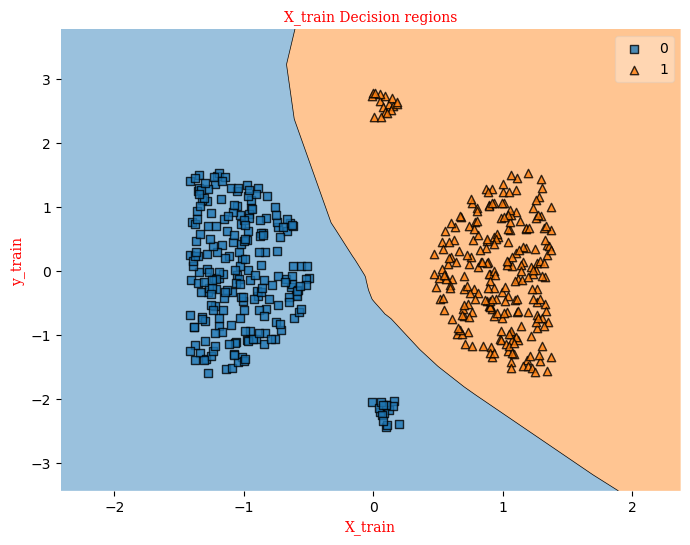

In [38]:
from mlxtend.plotting import plot_decision_regions as pt

plt.figure(figsize=(8,6))
pt(X_trains,y_train.values.astype(int),clf=model)
plt.title("X_train Decision regions",color='red',fontsize='medium',fontfamily='serif')
plt.xlabel("X_train",color='red',fontsize='medium',fontfamily='serif')
plt.ylabel("y_train",color='red',fontsize='medium',fontfamily='serif')
plt.show()

In [39]:
y_pred = model.predict(X_tests)

4/4 [==============================] - 0s 3ms/step


In [40]:
y_predf = np.array([1 if x>0.5 else 0 for x in y_pred])

15000/15000 [==============================] - 39s 3ms/step


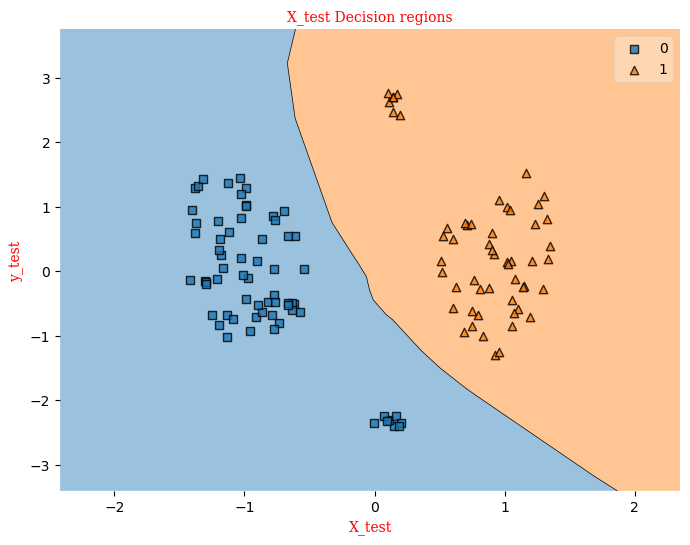

In [41]:
plt.figure(figsize=(8,6))
pt(X_tests,y_predf.astype(int),clf=model)
plt.title("X_test Decision regions",color='red',fontsize='medium',fontfamily='serif')
plt.xlabel("X_test",color='red',fontsize='medium',fontfamily='serif')
plt.ylabel("y_test",color='red',fontsize='medium',fontfamily='serif')
plt.show()